# **Lab 1.2 Image Visualization & Image Arithmetic Operation**

In [1]:
import cv2
import numpy as np
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import mpl_toolkits
import os
import matplotlib.animation as animation
from IPython.display import HTML

### **Color Model Visualization**
In this part, you will explore and visualize different color models by separating and displaying each channel individually. The color models we will work with include RGB, HSV, HLS, and YCrCb.<br>

**HINT**: `cv2.cvtColor()`

Display each channel for each color model in RGB space use `direct slicing method (array[...])`.<br>
**Color model:**
- RGB
- HSV
- HLS
- YCrCb



In [2]:
### START CODE HERE ###

img = cv2.imread('pic.jpg')

### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab1_image-representation/asset/2-1.png)

</details>

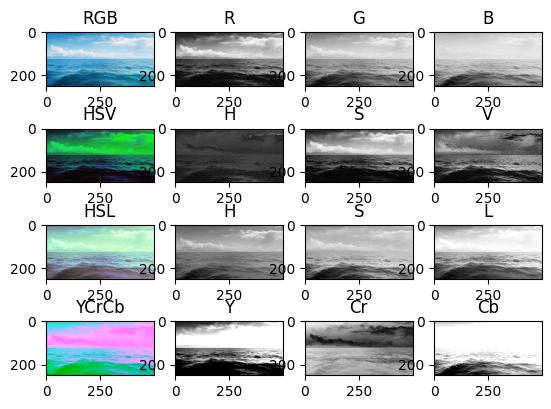

In [3]:
### START CODE HERE ###
fig, axs = plt.subplots(4,4)

rgb_img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
axs[0][0].imshow(rgb_img)
axs[0][0].set_title('RGB')
axs[0][1].imshow(rgb_img[:,:,0],cmap='gray')
axs[0][1].set_title('R')
axs[0][2].imshow(rgb_img[:,:,1],cmap='gray')
axs[0][2].set_title('G')
axs[0][3].imshow(rgb_img[:,:,2],cmap='gray')
axs[0][3].set_title('B')

hsv_img = cv2.cvtColor(img,cv2.COLOR_HSV2BGR)
axs[1][0].imshow(hsv_img)
axs[1][0].set_title('HSV')
axs[1][1].imshow(hsv_img[:,:,0],cmap='gray')
axs[1][1].set_title('H')
axs[1][2].imshow(hsv_img[:,:,1],cmap='gray')
axs[1][2].set_title('S')
axs[1][3].imshow(hsv_img[:,:,2],cmap='gray')
axs[1][3].set_title('V')

hls_img = cv2.cvtColor(img,cv2.COLOR_HLS2BGR)
axs[2][0].imshow(hls_img)
axs[2][0].set_title('HSL')
axs[2][1].imshow(hls_img[:,:,0],cmap='gray')
axs[2][1].set_title('H')
axs[2][2].imshow(hls_img[:,:,2],cmap='gray')
axs[2][2].set_title('S')
axs[2][3].imshow(hls_img[:,:,1],cmap='gray')
axs[2][3].set_title('L')

ycrcb_img = cv2.cvtColor(img,cv2.COLOR_YCR_CB2BGR)
axs[3][0].imshow(ycrcb_img)
axs[3][0].set_title('YCrCb')
axs[3][1].imshow(ycrcb_img[:,:,0],cmap='gray')
axs[3][1].set_title('Y')
axs[3][2].imshow(ycrcb_img[:,:,1],cmap='gray')
axs[3][2].set_title('Cr')
axs[3][3].imshow(ycrcb_img[:,:,2],cmap='gray')
axs[3][3].set_title('Cb')
plt.show()




### END CODE HERE ###

### **Images addition**
In this part, you will read two images using OpenCV and combine them using a weighted addition. You will explore how changing the weights affects the resulting image.

Read 2 images using OpenCV. Use your own images.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab1_image-representation/asset/2-2.png)

</details>

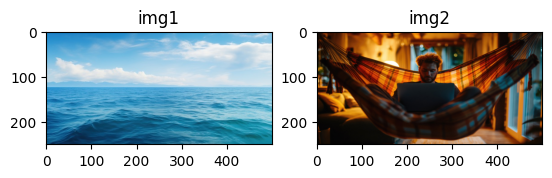

In [4]:
### START CODE HERE ###

img1 = cv2.imread('pic.jpg')
img2 = cv2.imread('pic2.jpg')

img1 = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)
img2 = cv2.cvtColor(img2,cv2.COLOR_RGB2BGR)

fig, axs = plt.subplots(1,2)

axs[0].imshow(img1)
axs[0].set_title('img1')
axs[1].imshow(img2)
axs[1].set_title('img2')

plt.show()
### END CODE HERE ###

Complete `img_addition()` in the cell below.
$$
\begin{align*}
Im\_addition &= w_1Im_1+w_2Im_2 \\
w_1 + w_2 &= 1.0
\end{align*}
$$

In [54]:
### START CODE HERE ###
def img_addition(img1,img2,w1,w2):
    return (w1/(w1+w2))*img1 + (w2/(w1+w2))*img2
### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [55]:
a = np.full((20, 20), 255)
b = np.full((20, 20), 255)
test_result = img_addition(a,b,1,1)
assert np.min(test_result) >= 0 and np.max(test_result) <= 255, \
    f"Pixel value out of range: min={np.min(test_result)}, max={np.max(test_result)}"

Use the `img_addition()` function here and save the result to an array for creating a video in a later part. Use weight values in the range [0, 1] with ***at least 20 steps***, ***first increasing from 0 to 1 and then decreasing from 1 back to 0***.

In [57]:
### START CODE HERE ###
image_array = []

for i in range(10):
    image_array.append(img_addition(img1,img2,i/9,1-(i/9)))

for i in range(10):
    image_array.append(img_addition(img1,img2,1-(i/9),i/9))

 
### END CODE HERE ###

Save the array of images to a video. Please complete the function below.

In [58]:
### START CODE HERE ###
def write_images_to_video(image_array, output_file, frame_rate=30):

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_file,fourcc, frame_rate,(image_array[0].shape[1], image_array[0].shape[0]))

    for temp_img in image_array:
        if temp_img.dtype != np.uint8:
            temp_img = cv2.convertScaleAbs(temp_img)
        out.write(temp_img)

    out.release()
    
### END CODE HERE ###

Use `write_images_to_video()` and save the result.

In [60]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

output_file =  os.path.join(output_folder, "output_image_add.mp4")
write_images_to_video(image_array,output_file)

Now use `matplotlib.animation` to display the animation from the images array.

In [75]:
%%capture
### START CODE HERE ###
fig, axs = plt.subplots()

image_array_show = []
for temp in image_array:
    image_array_show.append([axs.imshow(temp.astype(np.uint8), cmap='viridis', animated=True)])

ani = animation.ArtistAnimation(fig, image_array_show,interval=30,blit=True)
### END CODE HERE ###

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![addition-2.gif](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab1_image-representation/asset/addition.gif)

</details>

In [76]:
display(HTML(ani.to_jshtml()))

### **Image Bitwise AND operation**
Complete the `create_image_mask()` function in the cell below. Use `np.zeros()` and fill the desired area with 255. This function will return a mask.

In [24]:
### START CODE HERE ###
def create_image_mask(height, width, x, y):

    image_mask = np.zeros((height, width), dtype=int)
    for i in range(x[0],x[1]):
        for j in range(y[0],y[1]):
            image_mask[j][i] = 255

    return image_mask



### END CODE HERE ###

Use your `create_image_mask()` here and display your mask.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab1_image-representation/asset/2-3.png)

</details>

Text(0.5, 1.0, 'Mask')

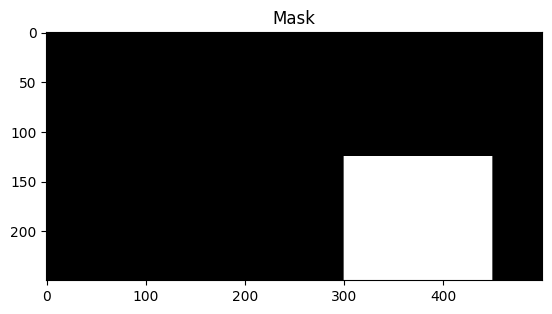

In [28]:
### START CODE HERE ###
   
image_mask = create_image_mask(250,500,[300,450],[125,250])
plt.imshow(image_mask,cmap='gray')
plt.title('Mask')
### END CODE HERE ###

Perform the bitwise AND operation between the image and the mask. Then, display the output as shown in the reference image below.

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/image_processing-2024/master/Lab1_image-representation/asset/2-4.png)

</details>

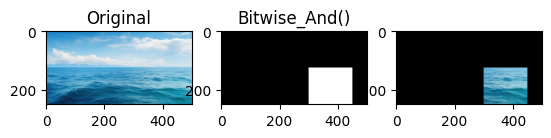

In [32]:
### START CODE HERE ###
fig, axs = plt.subplots(1,3)

axs[0].imshow(img1)
axs[0].set_title('Original')
axs[1].imshow(image_mask,cmap='gray')
axs[1].set_title('Mask')
axs[2].imshow(np.bitwise_and(img1, np.expand_dims(image_mask, axis=-1)))
axs[1].set_title('Bitwise_And()')

plt.show()
### END CODE HERE ###

---

## **Question**
1. When performing image subtraction, how does the order of the images (im1-im2 vs. im2-im1) affect the  resulting image?
2. If we want to censor a part of an image, explain your designed mask and the process using logic operation.
3. How would we obtain background of the scene if there are objects moving all the time and some objects moving very slow and sometimes stay still?